## Feature Engineering.

#### DESCRIPTION

- While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.

- Using the dataset, find the factors that influence price negotiations while buying a house.

- There are 79 explanatory variables describing every aspect of residential homes in Ames, Iowa.

#### Perform the following steps:
    1. Understand the dataset:
            a. Identify the shape of the dataset.
            b. Identify variables with null values.
            c. Identify variables with unique values.
        
    2. Generate a separate dataset for numerical and categorical variables.

    3. EDA of numerical variables:
    
        a. Missing value treatment.
        b. Identify the skewness and distribution.
        c. Identify significant variables using a correlation matrix.
        d. Pair plot for distribution and density.
        
    4. EDA of categorical variables.
    
        a. Missing value treatment.
        b. Count plot for bivariate analysis.
        c. Identify significant variables using p-values and Chi-Square values.
        
5. Combine all the significant categorical and numerical variables.

6. Plot box plot for the new dataset to find the variables with outliers.

- Note: The last two points are performed to make the new dataset ready for training and prediction.


##### 1) Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2) Read the dataset

In [3]:
#read the dataset
df_dataset=pd.read_csv("PEP1.csv")

In [4]:
type(df_dataset)

pandas.core.frame.DataFrame

In [5]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#display the first five rows of dataframe
df_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#display the last five rows of dataframe
df_dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
#identify shape of the dataframe
df_dataset.shape

(1460, 81)

#### Shape of the dataset : 1460 rows and 81 columns

In [9]:
#Print the name of the columns
df_dataset.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDr

In [10]:
#view index of the dataset
df_dataset.index

RangeIndex(start=0, stop=1460, step=1)

In [11]:
#check for any duplicate rows
df_dataset.duplicated().sum()

0

In [12]:
#check for any variables with null values
df_dataset.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
#subsetting to get variables with null values
df_dataset.isna().sum()[df_dataset.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
#count of the variables with missing values
df_dataset.isna().sum()[df_dataset.isna().sum()>0].shape

(19,)

#### Variables with null values:19

In [15]:
# Print the unique values
df_dataset.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [16]:
# Select the numerical variables
num_dataset = df_dataset.select_dtypes(exclude = 'object')
num_dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
#shape of the numerical dataset variables
num_dataset.shape

(1460, 38)

#### Numerical dataset with 1460 rows and 38 Columns

In [18]:
#variables with categorical dataset
cat_dataset = df_dataset.select_dtypes(include='object')
cat_dataset

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
#shape of the categorical dataset variables
cat_dataset.shape

(1460, 43)

#### Categorical dataset with 1460 rows and 43 Columns

#### 3. Descriptive stats and EDA

MISSING VALUE TREATMENT

In [20]:
#numerical dataset variables with missing values
num_dataset.isna().sum()[num_dataset.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [21]:
#missing values percentage for each variable
num_dataset.isna().sum()[num_dataset.isna().sum()>0]/1460*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [22]:
#count of the unique values in numerical dataset variables with missing values
num_dataset[['LotFrontage','MasVnrArea','GarageYrBlt']].nunique()

LotFrontage    110
MasVnrArea     327
GarageYrBlt     97
dtype: int64

In [23]:
#check count of the values in the numerical dataset variables with missing values
print(df_dataset['LotFrontage'].value_counts())
print(df_dataset['MasVnrArea'].value_counts())
print(df_dataset['GarageYrBlt'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


* column 'LotFrontage' with missing values percentage around 18 can be dropped
* column 'MasVnrArea' even if the missing values percentage is around 1, values of the variable (0 with 326 count),can be dropped
* column 'GarageYrBlt' with missing values percentage around 6 can be retained

In [24]:
#drop the column
df_dataset.drop(['LotFrontage','MasVnrArea'],axis=1,inplace=True)
df_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       '

In [25]:
#shape of the new dataframe
df_dataset.shape

(1460, 79)

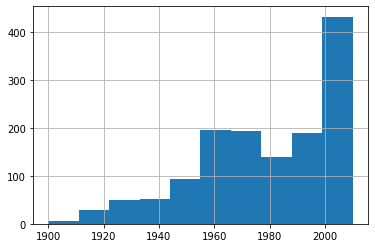

In [26]:
#skewness of missing value in numeric dataset variables
df_dataset['GarageYrBlt'].hist()
plt.show()

In [27]:
#missing value teatment for skewed varible
df_dataset.GarageYrBlt.fillna(0,inplace=True)

#### column 'GarageYrBlt' with year as data(even if it is negatively skewed)can be filled with zero to avoid data ambiguity

In [28]:
#check the column for non nullness
df_dataset.GarageYrBlt.isna().sum()

0

#### Skewness and distribution of numeric dataset variables

In [29]:
#skewness of the numeric dataset variable
num_dataset1=df_dataset.select_dtypes(exclude='object')
num_dataset1.skew()

Id                0.000000
MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [30]:
#distribution of numerical dataset variables
num_dataset1.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Correlation Matrix

In [31]:
#significant variables using correlation matrix
corr_matrix=num_dataset.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


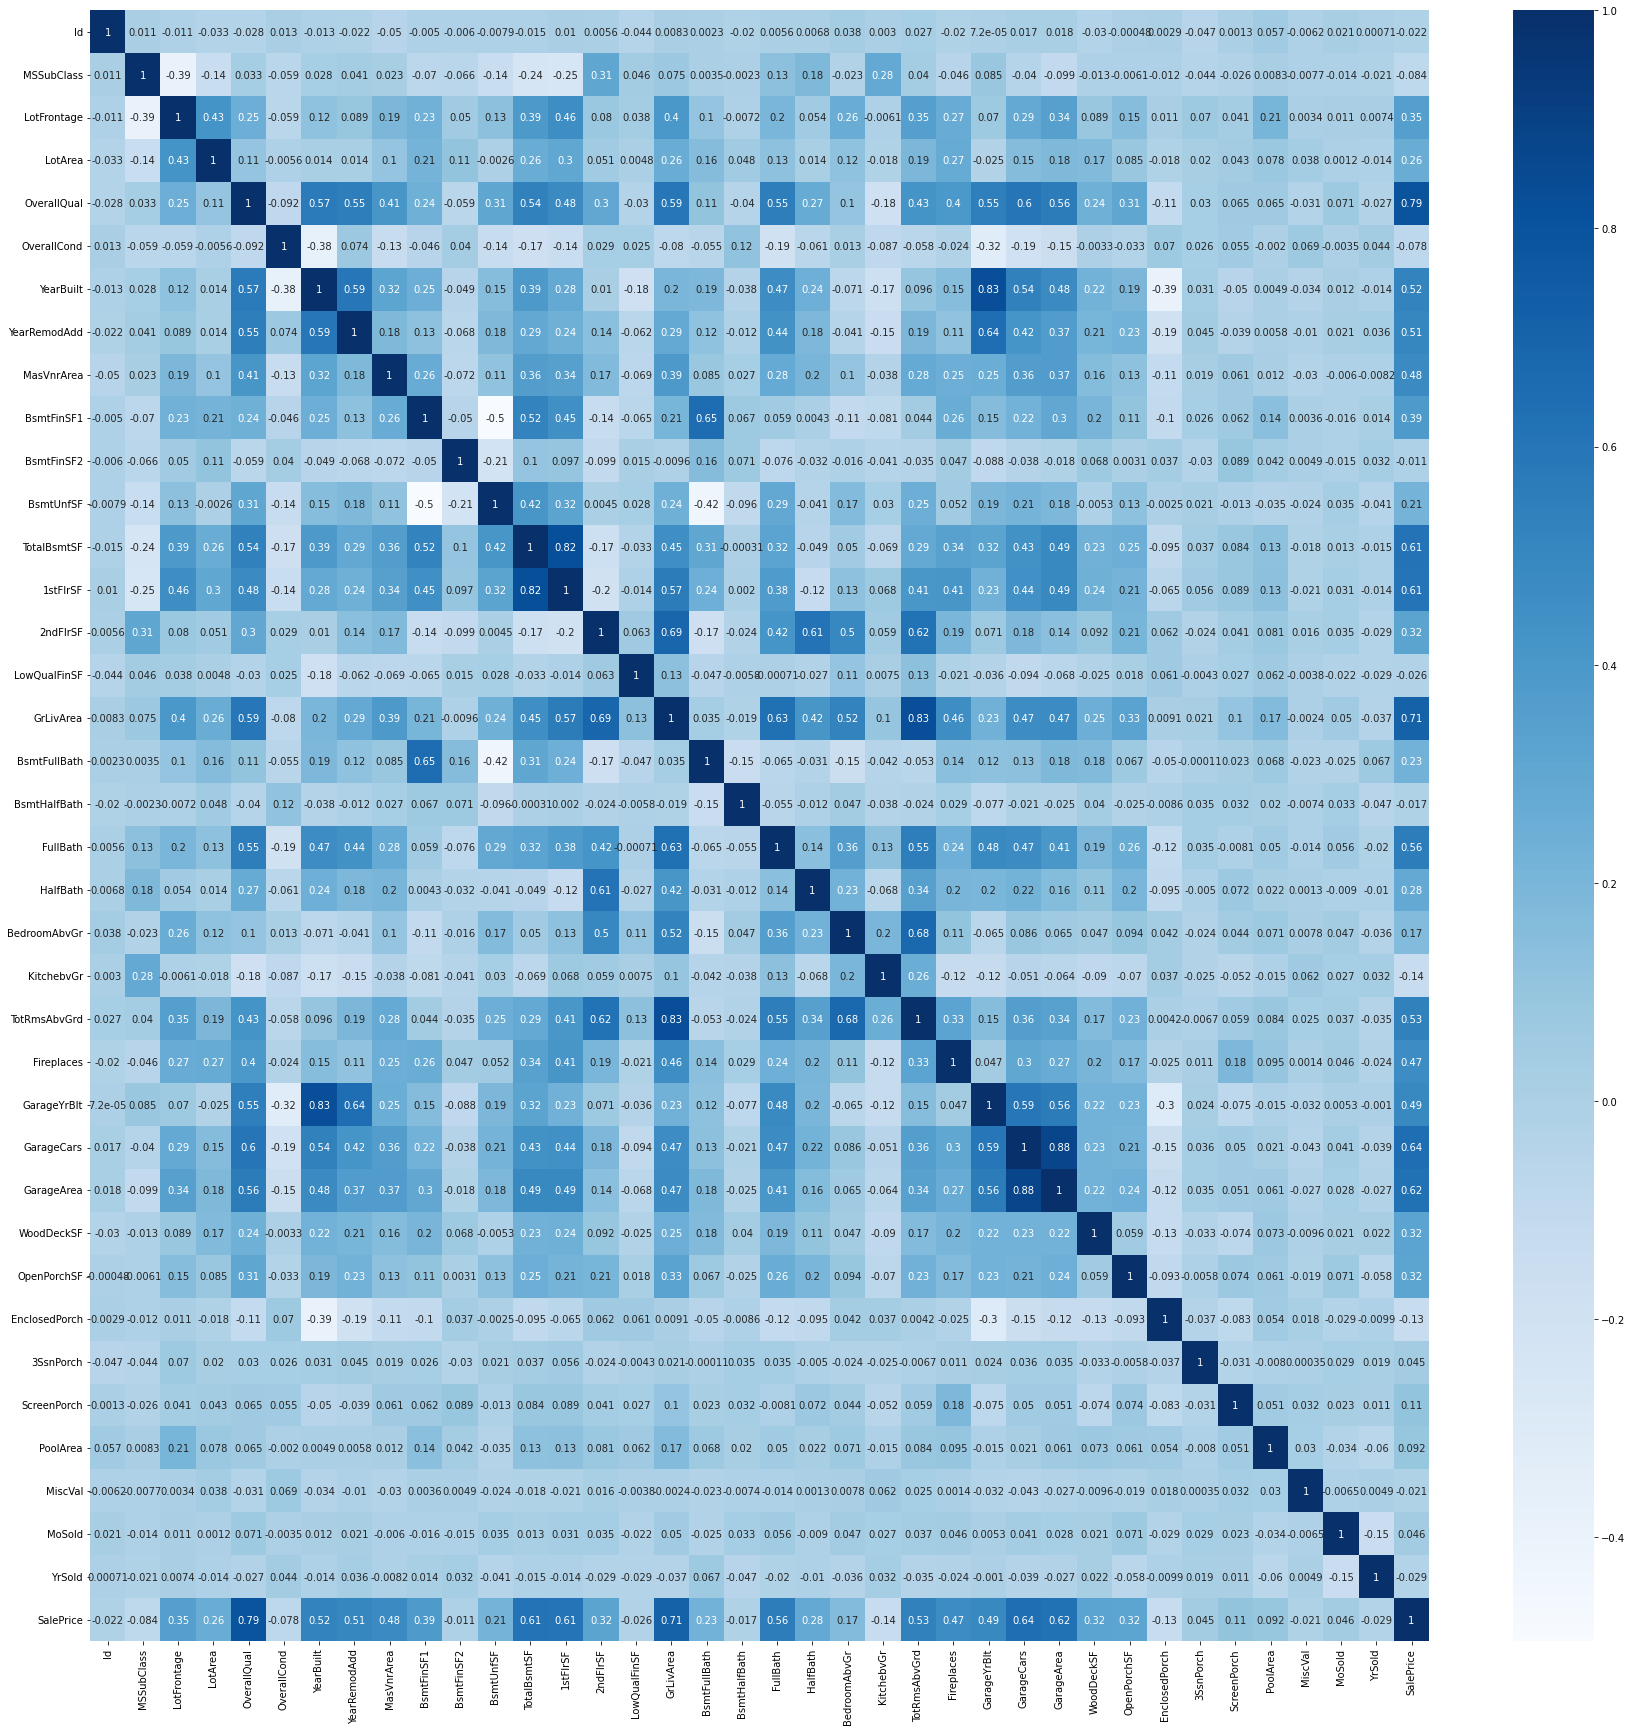

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True, cmap="Blues")
plt.show()

* Heatmap shows 'SalePrice'having very strong positive correlation (above 0.7) with 'OverallQual' and 'GrLivArea'
['YearBuilt', 'YearRemodAdd','TotalBsmtSF', '1stFlrSF', 'FullBath',
'TotRmsAbvGrd', 'GarageCars', 'GarageArea''] have positive correlation(above 0.5) with the target variable 'SalePrice'
Thus selected those variables with correlation above 0.5 as significant variables

In [33]:
new_corr_matrix=df_dataset[['OverallQual','YearBuilt','YearRemodAdd', 
                            '1stFlrSF','GrLivArea', 'FullBath','TotRmsAbvGrd',
                            'GarageCars', 'GarageArea','TotalBsmtSF','SalePrice']].corr()

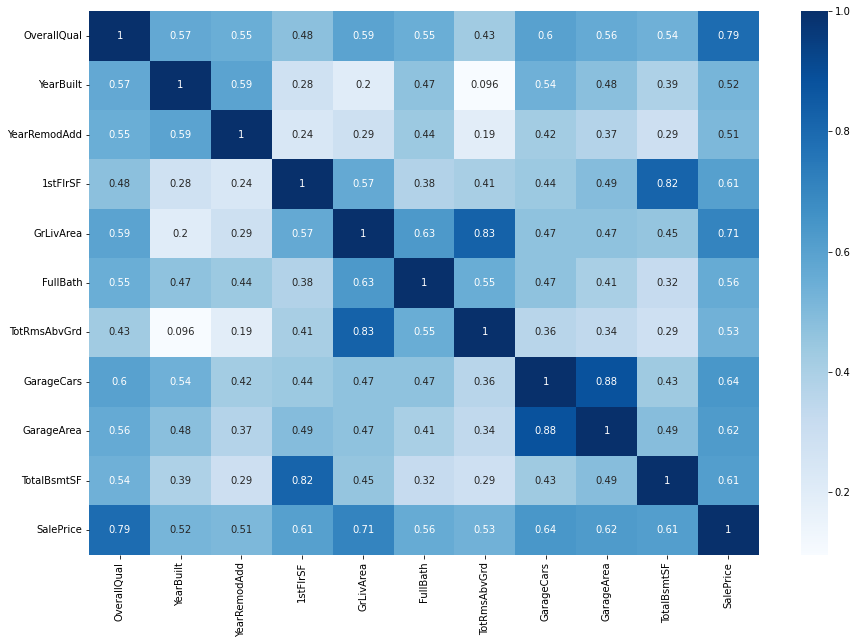

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(new_corr_matrix,annot=True, cmap="Blues")
plt.show()

#### PAIR PLOT FOR DISTRIBUTION AND DENSITY

In [35]:
#identify the significant numeric dataset variables
num_dataset1.nunique()

Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchebvGr          4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [36]:
# Selected the variables with more unique values to get a better scatterplot
num_dataset1.nunique()[num_dataset1.nunique()>200].index

Index(['Id', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [37]:
# variable 'Id' is vomitted as it is insignificant
sel_num_dataset1=['SalePrice','LotArea','OverallQual','YearBuilt','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','TotalBsmtSF']

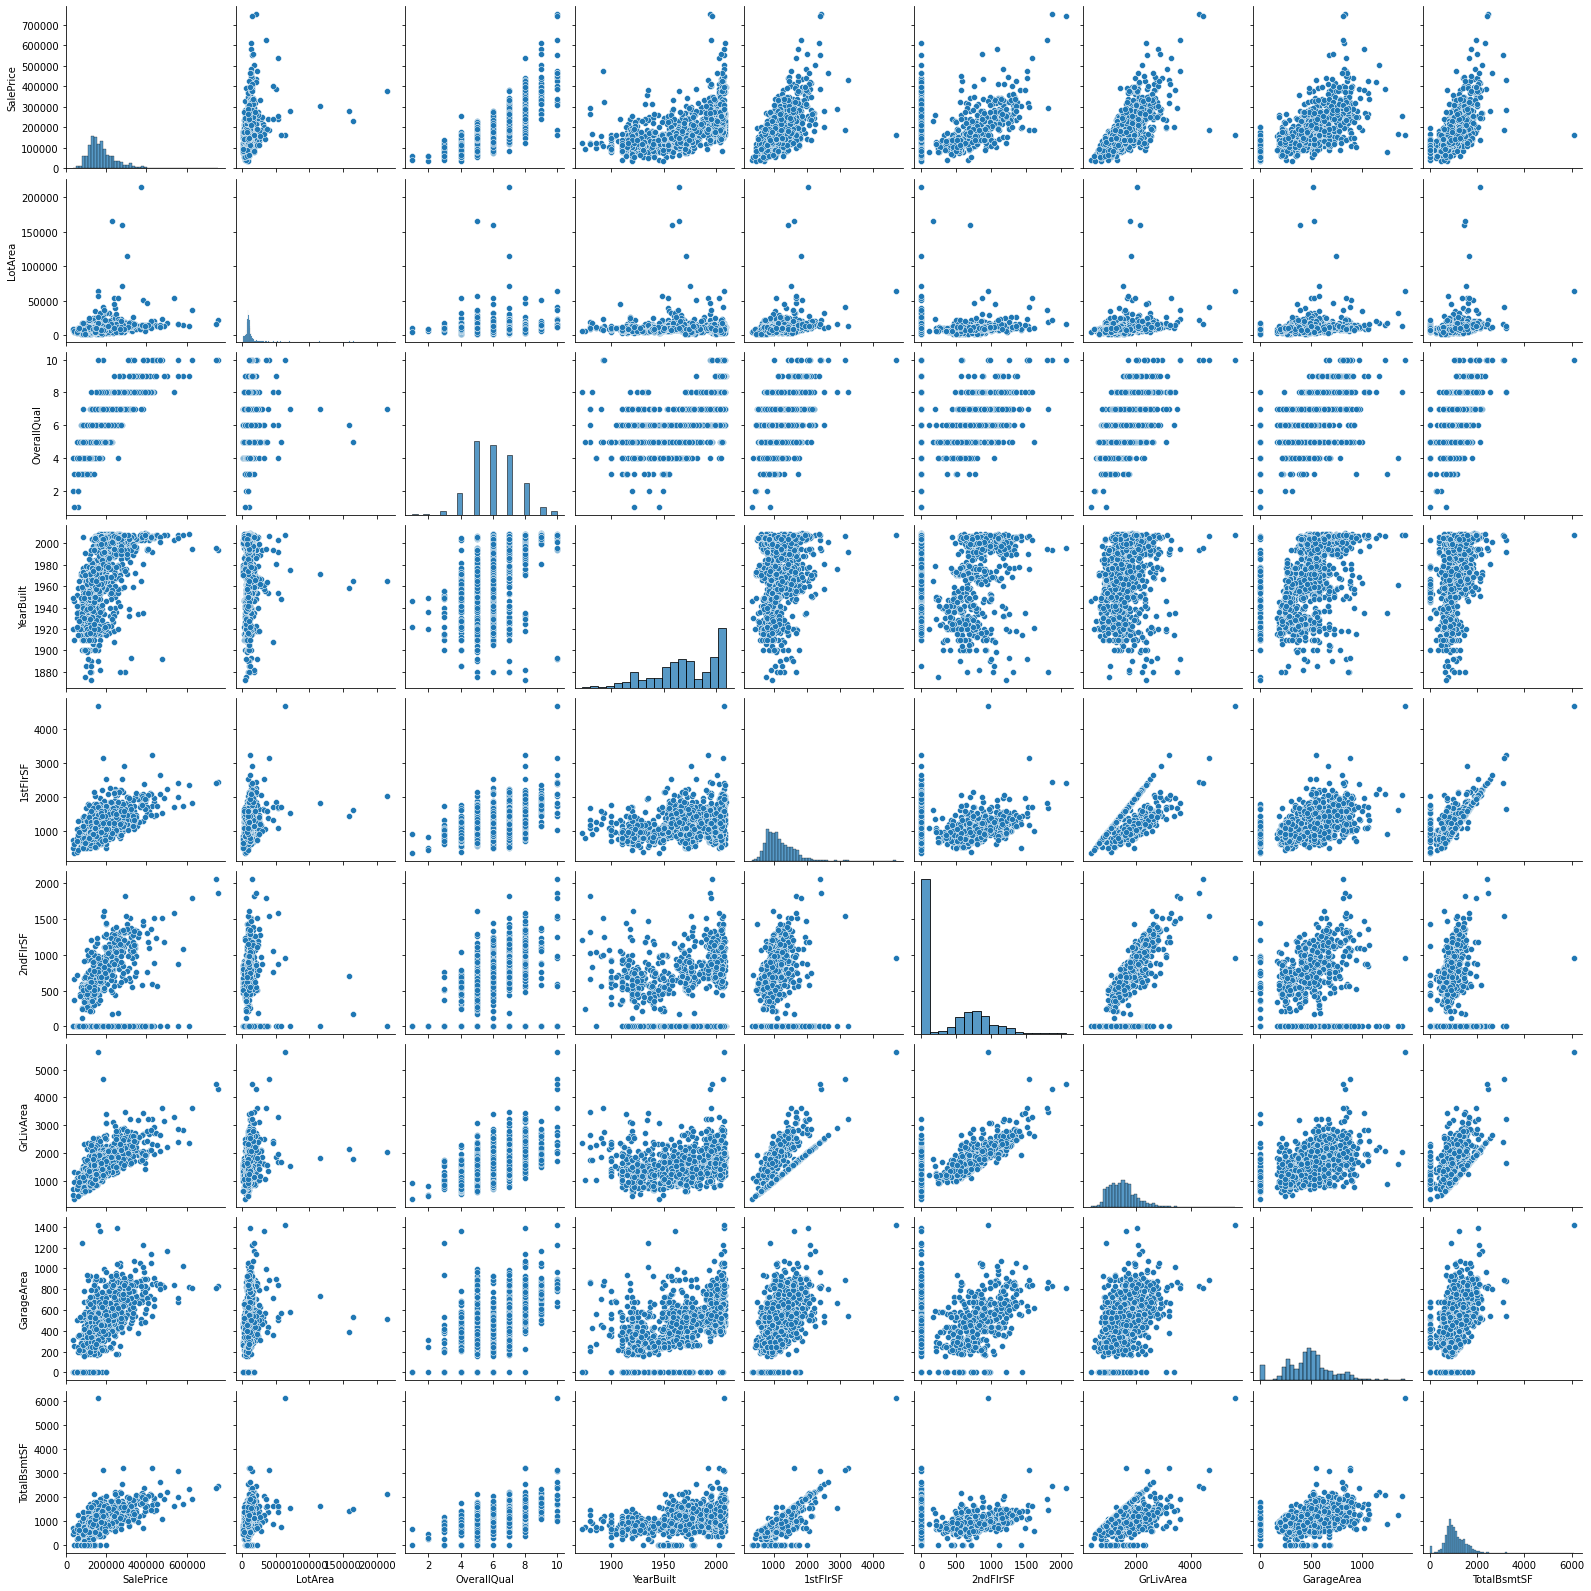

In [38]:
#pair plot for significant variables
sns.pairplot(df_dataset[sel_num_dataset1])
plt.show()

#### Selected variables shows a good correlation with the target variable 'SalePrice'

#### Plot for Probability Density Function

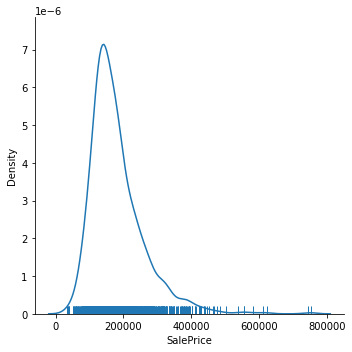

In [39]:
sns.displot(df_dataset['SalePrice'],kind='kde',rug=True)
plt.show()

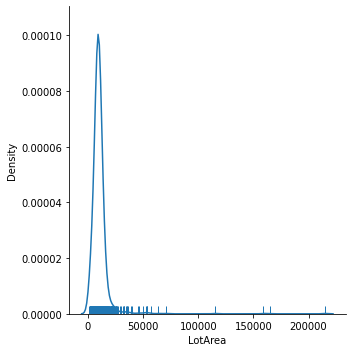

In [40]:
sns.displot(df_dataset['LotArea'],kind='kde',rug=True)
plt.show()

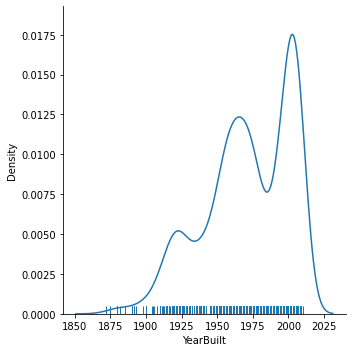

In [41]:
sns.displot(data=df_dataset['YearBuilt'],kind='kde',rug=True)
plt.show()

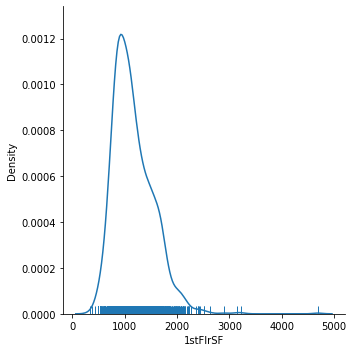

In [42]:
sns.displot(df_dataset['1stFlrSF'],kind='kde',rug=True)
plt.show()

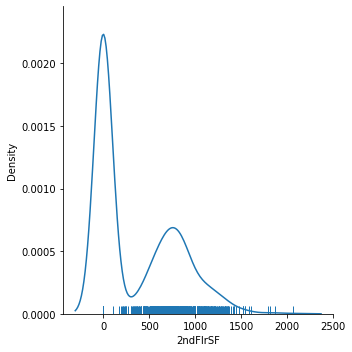

In [43]:
sns.displot(df_dataset['2ndFlrSF'],kind='kde',rug=True)
plt.show()

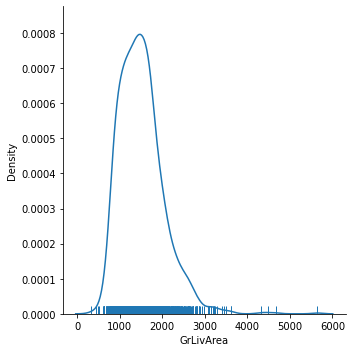

In [44]:
sns.displot(df_dataset['GrLivArea'],kind='kde',rug=True)
plt.show()

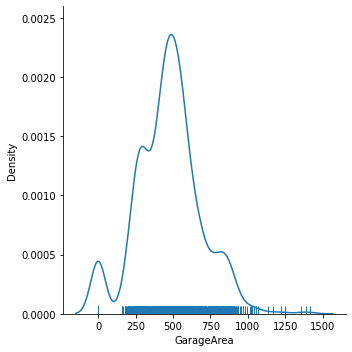

In [45]:
sns.displot(df_dataset['GarageArea'],kind='kde',rug=True)
plt.show()

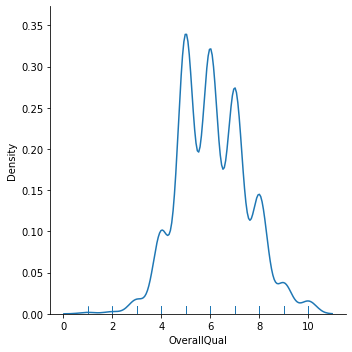

In [46]:
sns.displot(df_dataset['OverallQual'],kind='kde',rug=True)
plt.show()

In [47]:
#significant numerical dataset variables obtained from heatmap and pair plot
df_dataset[sel_num_dataset1].columns

Index(['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

#### MISSING VALUE TREATMENT FOR CATEGORICAL DATASET VARIABLES

In [48]:
#categorical dataset variables with missing values
cat_dataset1=cat_dataset.isna().sum()[cat_dataset.isna().sum()>0]
cat_dataset1

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [49]:
cat_dataset.isna().sum()[cat_dataset.isna().sum()>0]/cat_dataset.shape[0] * 100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [50]:
#subsetting to remove insignificant variables from missing data variables hence more missing values doesnt make any sense
cat_dataset1[cat_dataset1>100]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

* Droping the variables ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'] as it lacks missing values >= 45%

In [51]:
#drop the insignificant columns
df_dataset.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
  

In [52]:
#shape of the dataframe
df_dataset.shape

(1460, 74)

In [53]:
#indexing the retained missing variables
new_cat_dataset=cat_dataset1[cat_dataset1<100].index
new_cat_dataset

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [54]:
#mode of the retained missing variables 
df_dataset[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'Electrical','GarageType','GarageFinish','GarageQual','GarageCond']].mode()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,None,TA,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA


In [55]:
#fill the null values with most frequent data in the corresponding column

df_dataset.fillna(value={'MasVnrType':'None','BsmtQual':'TA','BsmtCond':'TA','BsmtExposure':'No',
'BsmtFinType1':'Unf','BsmtFinType2':'Unf','Electrical':'SBrkr','GarageType':'Attchd','GarageFinish':'Unf',
                         'GarageQual':'TA','GarageCond':'TA'},inplace=True)

In [56]:
#check for any null values
df_dataset.isna().sum()[df_dataset.isna().sum()>0]

Series([], dtype: int64)

In [57]:
new_cat_dataset=df_dataset.select_dtypes(include='object')
new_cat_dataset.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
new_cat_dataset.columns.shape

(38,)

#### Count Plot of the Categorical Variable

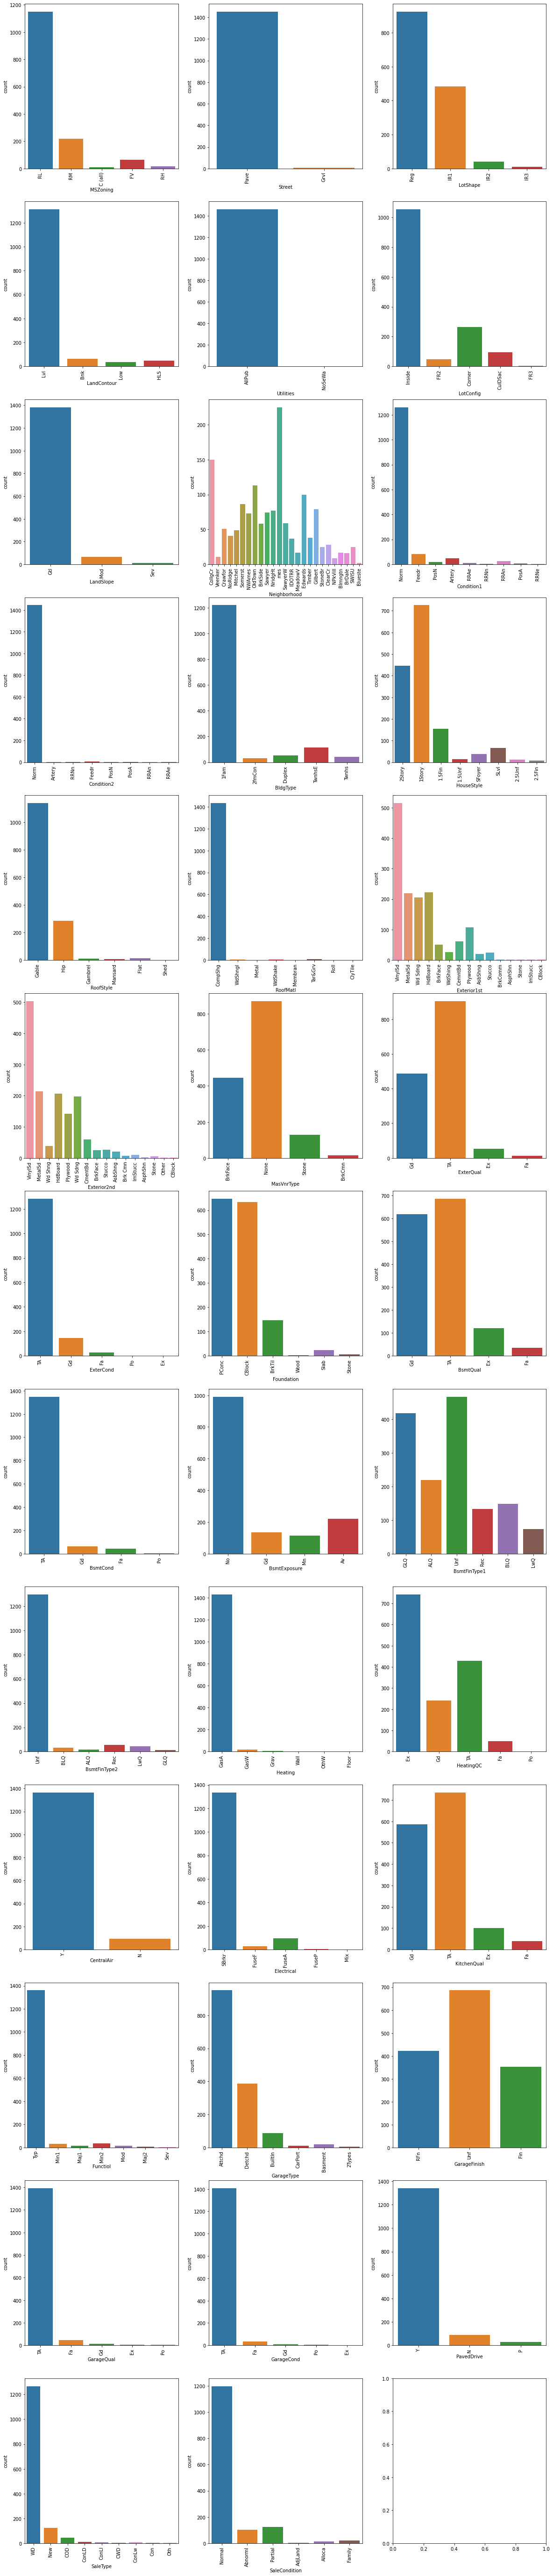

In [59]:
fig,ax=plt.subplots(13,3,figsize=(20,100))
for column,subplot in zip(new_cat_dataset,ax.flatten()):
    sns.countplot(x=column,data=df_dataset,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Box plot of categorical dataset against the target variable 'SalePrice'for bivariate analysis

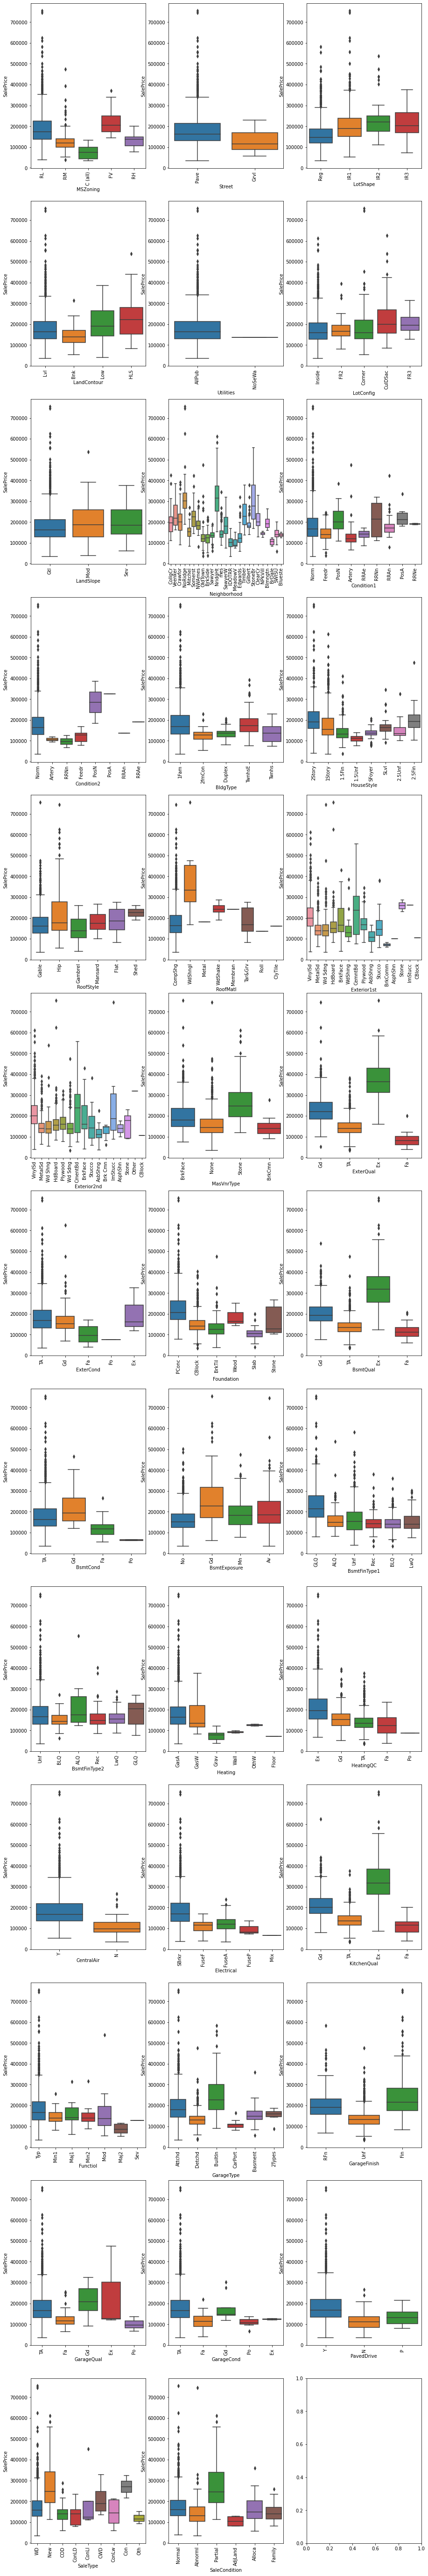

In [62]:
#box plot for categorical dataset
fig,ax=plt.subplots(13,3,figsize=(15,100))
for column,subplot in zip(new_cat_dataset,ax.flatten()):
    sns.boxplot(x=column,y='SalePrice',data=df_dataset,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

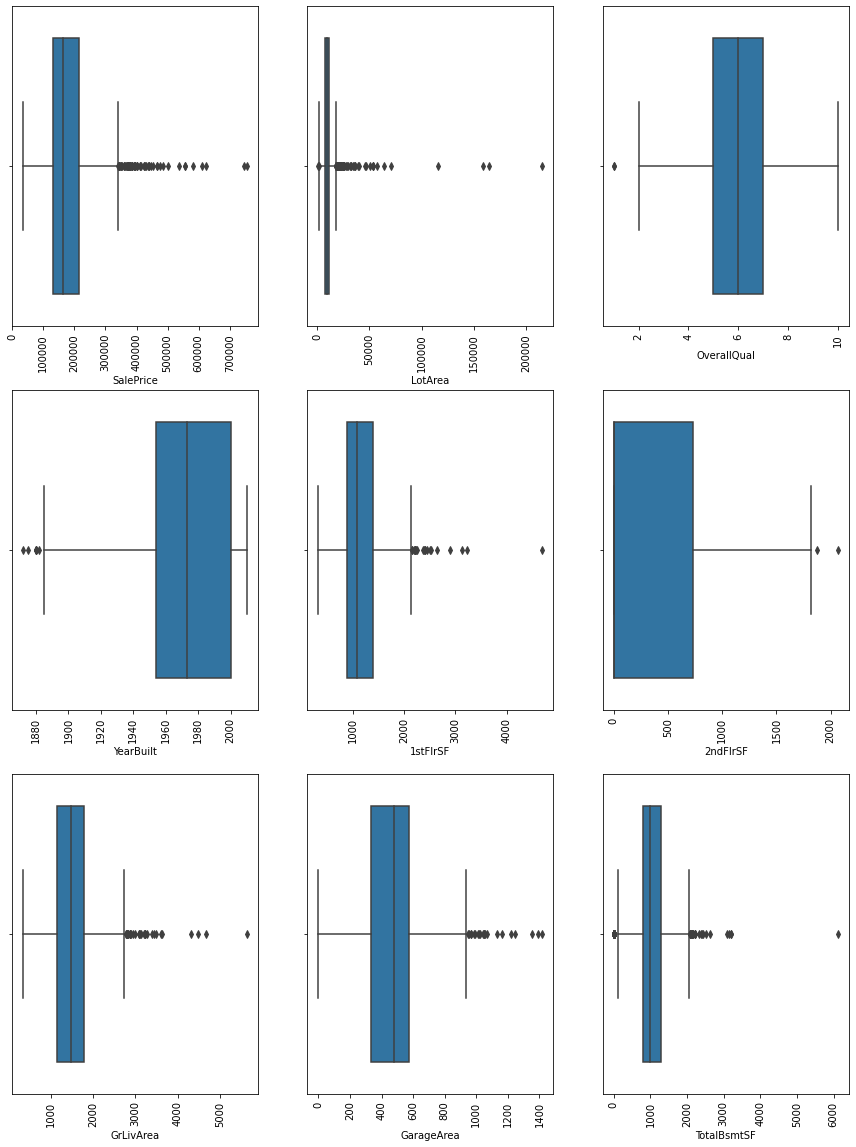

In [63]:
#box plot for categorical dataset
fig,ax=plt.subplots(3,3,figsize=(15,20))
for column,subplot in zip(sel_num_dataset1,ax.flatten()):
    sns.boxplot(x=column,data=df_dataset,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Categorical dataset against SalePrice shows outliers...this can be removed using outlier removingtechniques